In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV






In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
df=pd.read_csv('Twitter Sentiments.csv')

In [5]:
tweets=df["tweet"]

In [6]:
port_stem=PorterStemmer()


In [7]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)             #^ used to remove all others expect given in the sequence a-zA-Z
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content


In [8]:
df["stemmed_content"]=df["tweet"].apply(stemming)



In [9]:
df.head()

,id,label,tweet,stemmed_content
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit use caus offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv


In [10]:
print(df["stemmed_content"])

0        user father dysfunct selfish drag kid dysfunct...
1        user user thank lyft credit use caus offer whe...
2                                           bihday majesti
3                              model love u take u time ur
4                                  factsguid societi motiv
                               ...                        
31957                                   ate user isz youuu
31958    see nina turner airwav tri wrap mantl genuin h...
31959             listen sad song monday morn otw work sad
31960     user sikh templ vandalis calgari wso condemn act
31961                                    thank user follow
Name: stemmed_content, Length: 31962, dtype: object


In [11]:
pip install wordcloud

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


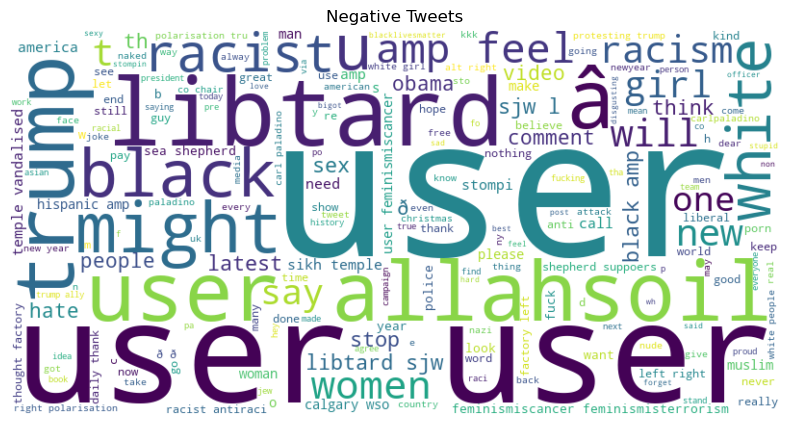

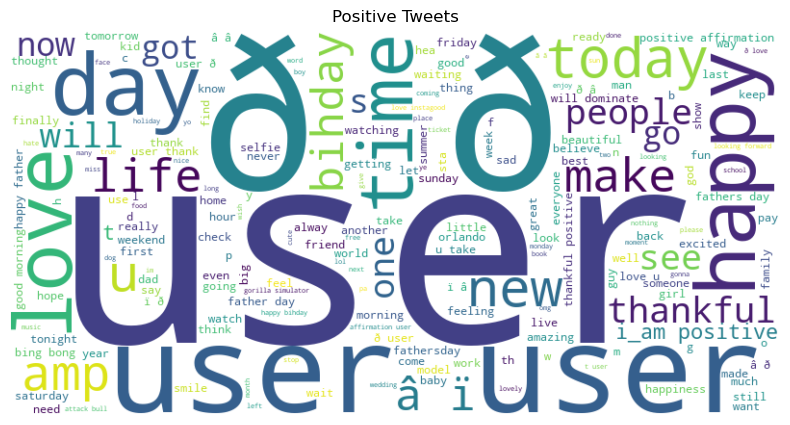

In [16]:
negative_tweets = df['tweet'][df['label'] == 1].to_string()
positive_tweets = df['tweet'][df['label'] == 0].to_string()

plot_wordcloud(negative_tweets, 'Negative Tweets')
plot_wordcloud(positive_tweets, 'Positive Tweets')



In [20]:
X=df["stemmed_content"].values
Y=df["label"].values

In [21]:
print(X)

['user father dysfunct selfish drag kid dysfunct run'
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank'
 'bihday majesti' ... 'listen sad song monday morn otw work sad'
 'user sikh templ vandalis calgari wso condemn act' 'thank user follow']


In [22]:
print(Y)

[0 0 0 ... 0 1 0]


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state= 100)

In [24]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000)

In [25]:
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)

In [26]:
X_test_tfidf=tfidf_vectorizer.fit_transform(X_test)

In [27]:
X_test.shape

(9589,)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
rfc = RandomForestClassifier()

In [30]:
X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)
Y_train_reshaped = Y_train.reshape(-1, 1)
Y_test_reshaped=Y_test.reshape(-1,1)

In [31]:
rfc.fit(X_train_tfidf, Y_train)

RandomForestClassifier()

In [31]:
rfc.score(X_train_tfidf,Y_train)

0.9997318196039869

In [32]:
print(X_train_tfidf)

  (0, 865)	0.6081570469368017
  (0, 2988)	0.36034738200452454
  (0, 1933)	0.7073151847257304
  (1, 4040)	0.35754563705928866
  (1, 2610)	0.2578743120277064
  (1, 3146)	0.7204285459700801
  (1, 1897)	0.5353920682710388
  (2, 1196)	0.30429979469763035
  (2, 3321)	0.39512597670443694
  (2, 180)	0.2810681332063919
  (2, 2218)	0.3276343890704545
  (2, 4780)	0.22532000114338685
  (2, 4373)	0.26504845288872314
  (2, 1582)	0.3276343890704545
  (2, 1498)	0.21416455046992944
  (2, 1423)	0.2297430733873809
  (2, 2899)	0.27418105641352597
  (2, 3322)	0.32477751641520136
  (2, 1384)	0.23930192136041747
  (3, 4072)	0.5489995575297117
  (3, 3621)	0.6264670035106532
  (3, 2552)	0.5532979119286137
  (4, 1647)	0.2792997654591592
  (4, 1676)	0.3786551928728426
  (4, 1674)	0.2970103753123904
  :	:
  (22369, 4476)	0.40732199350883735
  (22369, 4659)	0.5070567173730274
  (22369, 4336)	0.4536923985448279
  (22369, 2610)	0.3207894948989391
  (22370, 3783)	1.0
  (22371, 2217)	0.38004546803877653
  (22371, 505)

In [33]:
Y_pred = rfc.predict(X_test_tfidf)
Y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
params = {'max_depth': list(range(10, 15)), 'n_estimators' : list(range(1,20)), 'random_state': list(range(10, 15))}

gsv = GridSearchCV(RandomForestClassifier(), params, cv = 5, n_jobs = -1, scoring='accuracy')

gsv.fit(X_train_tfidf,Y_train_reshaped)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                         'random_state': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [36]:
print("Best estimator is: ", gsv.best_estimator_)
print("Best parameters are: ", gsv.best_params_)
print("Best score is: ", gsv.best_score_)

Best estimator is:  RandomForestClassifier(max_depth=14, n_estimators=2, random_state=13)
Best parameters are:  {'max_depth': 14, 'n_estimators': 2, 'random_state': 13}
Best score is:  0.941268508552206


In [37]:
y_pred = gsv.best_estimator_.predict(X_test_tfidf)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=50)

In [40]:
print("Accuracy score of our model is : ", metrics.accuracy_score(Y_test_reshaped,Y_pred))

print("Confusion matrix is : ", '\n' , metrics.confusion_matrix(Y_test_reshaped,Y_pred))

print("Classification report is : ", '\n', metrics.classification_report(Y_test_reshaped,Y_pred))

print("Cross Validation Score is: ", cross_val_score(RandomForestClassifier(), X_train_tfidf, Y_train_reshaped, cv = 2))

Accuracy score of our model is :  0.9071853165084993
Confusion matrix is :  
 [[8661  260]
 [ 630   38]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8921
           1       0.13      0.06      0.08       668

    accuracy                           0.91      9589
   macro avg       0.53      0.51      0.51      9589
weighted avg       0.88      0.91      0.89      9589



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Cross Validation Score is:  [0.95494771 0.95449669]


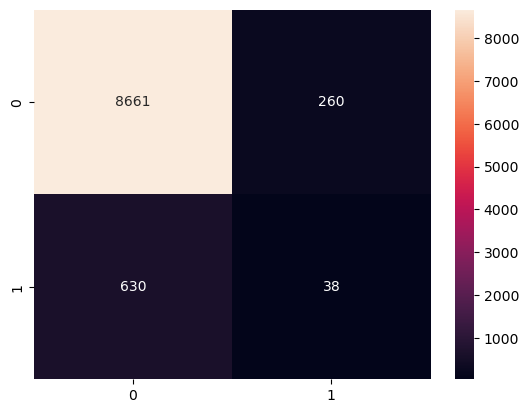

In [41]:
sns.heatmap(metrics.confusion_matrix(Y_test_reshaped,Y_pred), annot = True, fmt = 'd')
plt.show()

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

In [44]:
ada_boost.fit(X_train_tfidf, Y_train_reshaped)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [46]:
y_pred = ada_boost.predict(X_test_tfidf)

In [47]:
print("Accuracy score of our model is : ", metrics.accuracy_score(Y_test,Y_pred))

print("Confusion matrix is : ", '\n' , metrics.confusion_matrix(Y_test,Y_pred))

print("Classification report is : ", '\n', metrics.classification_report(Y_test,Y_pred))

print("Cross Validation Score is: ", cross_val_score(AdaBoostClassifier(), X_train_tfidf, Y_train_reshaped, cv = 2))

Accuracy score of our model is :  0.9071853165084993
Confusion matrix is :  
 [[8661  260]
 [ 630   38]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8921
           1       0.13      0.06      0.08       668

    accuracy                           0.91      9589
   macro avg       0.53      0.51      0.51      9589
weighted avg       0.88      0.91      0.89      9589



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Score is:  [0.93948333 0.94457357]
